<a href="https://colab.research.google.com/github/lauravalentinamm/Tareas_Mineria_Python/blob/main/Entrega1_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### RIESGO DE IMPAGO

Integrantes Grupo 3: Saray Daniella Garcia, Laura Valentina Montes Montes,Juan Felipe Vargas, Hasbleidy Andrea Sastoque

La presente base de datos es tomada de la plataforma kaggle (https://www.kaggle.com/gauravduttakiit/loan-defaulter) contiene 122 columnas y 307511 filas que corresponden a un cliente en especifico que toma un servicio financiero como lo es el prestamo o credito, el objetivo del presente trabajo es buscar y analizar el mejor metodo que nos permita minimizar el riesgo de perder dinero al otorgar préstamos a clientes por parte de las entidades.

Cabe resaltar que de las 122 columnas se van a trabajar 24 debido a que consideramos que son las mas importantes.

In [2]:
import pandas as pd
datos = pd.read_csv('datos.csv', 
                 sep = ';',
                 index_col=False,
                 error_bad_lines=False,
                 )
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0


In [3]:
len(datos)

307511

In [4]:
datos.isna().sum()

ID                                0
TARGET                            0
CONTRACT_TYPE                     0
SEX                               0
OWN_REALTY                        0
CHILDREN                          0
INCOME                            0
CREDIT                            0
INCOME_TYPE                       0
EDUCATION_TYPE                    0
FAMILY_STATUS                     0
HOUSING_TYPE                      0
BIRTH                             0
EMPLOYED                          0
EMP_PHONE                         0
CONT_MOBILE                       0
EMAIL                             0
OCCUPATION_TYPE               96391
WEEKDAY                           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT                     1021
DEF_60_CNT                     1021
DAYS_LAST_PHONE_CHANGE            1
BUREAU_3                      41519
dtype: int64

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [17]:
df_default = datos[datos['TARGET']== 1]
df_default.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group,CREDIT_group,BIRTH_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]","(275000, 600000]","(20, 30]"
26,100031,1,Cash loans,F,1,0,112500,979992,Workingg,Secondary / secondary special,Widow,House / apartment,52,7,1,1,0,Cooking staff,MONDAY,0,1.0,0.0,-161.0,2.0,"(100000, 175000]","(875000, 4050000]","(50, 70]"
40,100047,1,Cash loans,M,1,0,202500,1193580,Commercial associate,Secondary / secondary special,Married,House / apartment,48,4,1,1,0,Laborers,TUESDAY,0,0.0,0.0,-1075.0,0.0,"(175000, 250000]","(875000, 4050000]","(40, 50]"
42,100049,1,Cash loans,F,0,0,135000,288873,Workingg,Secondary / secondary special,Civil marriage,House / apartment,37,10,1,1,0,Sales staff,THURSDAY,0,0.0,0.0,-1480.0,0.0,"(100000, 175000]","(275000, 600000]","(30, 40]"
81,100096,1,Cash loans,F,1,0,81000,252000,Pensioner,Secondary / secondary special,Married,House / apartment,68,50,0,1,0,NaN,THURSDAY,0,1.0,1.0,0.0,0.0,"(25000, 100000]","(45000, 275000]","(50, 70]"


In [7]:
df = datos[datos['SEX']!= 'XNA']
df.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0


In [9]:
datos["INCOME_group"] = pd.cut(datos["INCOME"], bins=[25000,100000,175000,250000,336835935])
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]"
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0,"(250000, 336835935]"
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0,"(25000, 100000]"
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN,"(100000, 175000]"
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0,"(100000, 175000]"


In [10]:
datos["CREDIT_group"] = pd.cut(datos["CREDIT"], bins=[45000,275000,600000,875000,4050000])
datos.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group,CREDIT_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]","(275000, 600000]"
1,100003,0,Cash loans,F,0,0,270000,1293503,State servant,Higher education,Married,House / apartment,46,3,1,1,0,Core staff,MONDAY,0,0.0,0.0,-828.0,0.0,"(250000, 336835935]","(875000, 4050000]"
2,100004,0,Revolving loans,M,1,0,67500,135000,Workingg,Secondary / secondary special,Single / not married,House / apartment,52,1,1,1,0,Laborers,MONDAY,0,0.0,0.0,-815.0,0.0,"(25000, 100000]","(45000, 275000]"
3,100006,0,Cash loans,F,1,0,135000,312683,Workingg,Secondary / secondary special,Civil marriage,House / apartment,52,8,1,1,0,Laborers,WEDNESDAY,0,0.0,0.0,-617.0,NaN,"(100000, 175000]","(275000, 600000]"
4,100007,0,Cash loans,M,1,0,121500,513000,Workingg,Secondary / secondary special,Single / not married,House / apartment,55,8,1,1,0,Core staff,THURSDAY,0,0.0,0.0,-1106.0,0.0,"(100000, 175000]","(275000, 600000]"


In [11]:
datos["CREDIT_group"] = pd.cut(datos["CREDIT"], bins=[45000,275000,600000,875000,4050000])

In [12]:
datos["BIRTH_group"] = pd.cut(datos["BIRTH"], bins=[20,30,40,50,70])

In [13]:
datos["INCOME_group"] = pd.cut(datos["INCOME"], bins=[25000,100000,175000,250000,336835935])

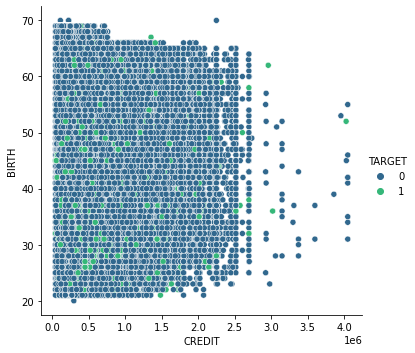

In [14]:
sns.relplot(data=datos, x="CREDIT", y="BIRTH", hue = 'TARGET', palette='viridis')

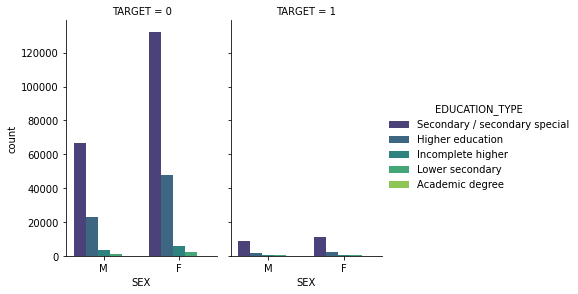

In [15]:
g = sns.catplot(x="SEX", hue="EDUCATION_TYPE", col="TARGET",
               data=df, kind="count",
               height=4, aspect=.7, palette="viridis");


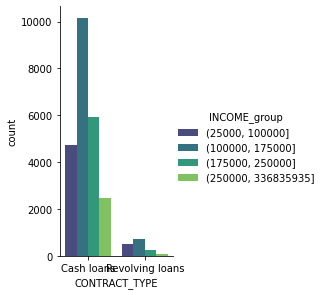

In [18]:
g = sns.catplot(x="CONTRACT_TYPE", hue="INCOME_group",
               data=df_default, kind="count",
               height=4, aspect=.7, palette="viridis");

<Figure size 14400x14400 with 0 Axes>

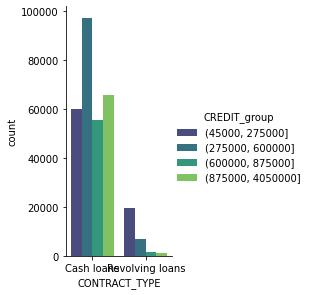

In [ ]:
plt.figure(figsize=(200,200))
sns.catplot(x="CONTRACT_TYPE", hue="CREDIT_group",
               data=datos, kind="count",
               height=4, aspect=.7, palette="viridis")


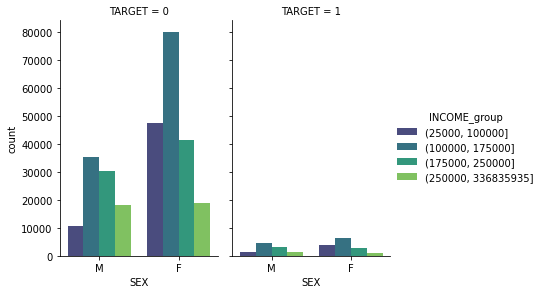

In [ ]:
g = sns.catplot(x="SEX", hue="INCOME_group", col="TARGET",
                data=df, kind="count",
                height=4, aspect=.7, palette="viridis");

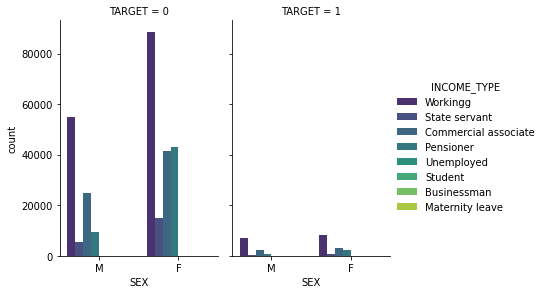

In [ ]:
g = sns.catplot(x="SEX", hue="INCOME_TYPE", col="TARGET",
                data=df, kind="count",
                height=4, aspect=.7, palette="viridis");

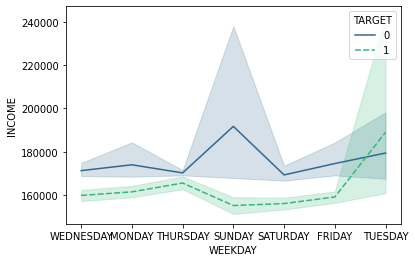

In [ ]:
#sns.lineplot(data=df_default, x='WEEKDAY', y = '' palette="viridis")
#sns.lineplot(data=datos, x="WEEKDAY", y="CREDIT", hue="TARGET", style = 'TARGET', palette="viridis")
sns.lineplot(data=datos, x="WEEKDAY", y="INCOME", hue="TARGET", style = 'TARGET', palette="viridis")

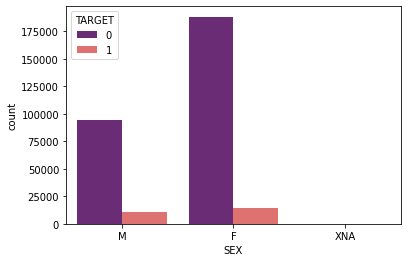

In [ ]:
sns.countplot(data=datos, x='SEX',hue='TARGET',palette="magma")

In [ ]:
tab3 = df[['SEX', "TARGET"]].value_counts().rename_axis(['label', 'Target']).reset_index(name='counts')
tab3


,label,Target,counts
0,F,0,188278
1,M,0,94404
2,F,1,14170
3,M,1,10655


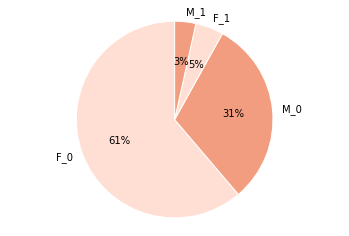

In [ ]:
explode = (0, 0.1, 0, 0.1, 0)
colors = [ '#ffded3', '#f29d7f']
mylabels = ['F_0',"M_0",'F_1', "M_1"]
fig1, ax1 = plt.subplots()
ax1.pie(tab3['counts'],
        labels=mylabels,
        #explode = explode,
        autopct='%1.0f%%',
        shadow=False, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        colors=colors
     )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
tab4 = datos['CHILDREN'].value_counts().rename_axis('# Hijos').reset_index(name='# Personas')
tab4

,# Hijos,# Personas
0,0,215371
1,1,61119
2,2,26749
3,3,3717
4,4,429
5,5,84
6,6,21
7,7,7
8,14,3
9,19,2


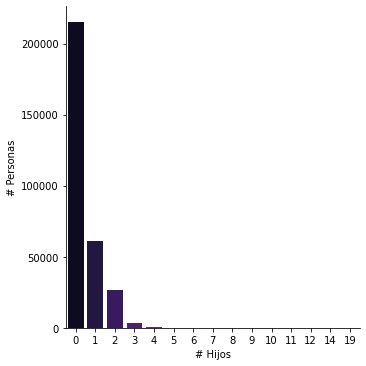

In [ ]:
sns.catplot(data = tab4,
            kind = "bar",
            estimator = sum,
            x = "# Hijos",
            y = "# Personas",
            palette = 'magma',
            ci = None)


In [ ]:
tab4 = datos[['CHILDREN', 'TARGET', 'INCOME']].value_counts().rename_axis(['# Hijos', 'Target', 'Ingreso']).reset_index(name='# Personas')
tab4

,# Hijos,Target,Ingreso,# Personas
0,0,0,135000,22723
1,0,0,112500,20072
2,0,0,157500,16916
3,0,0,180000,15412
4,0,0,90000,14411
...,...,...,...,...
4122,2,0,77985,1
4123,2,0,79079,1
4124,0,0,555327,1
4125,0,0,549000,1


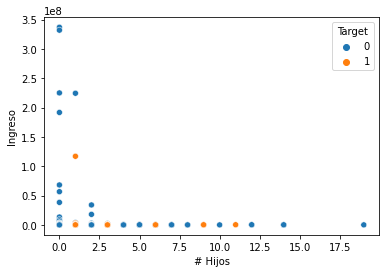

In [ ]:
sns.scatterplot(data=tab4,  x="# Hijos", y="Ingreso", hue = "Target")

In [ ]:
tab5 = datos[['SEX','EDUCATION_TYPE']].value_counts().rename_axis(['Sexo','Nivel Educativo']).reset_index(name='# Personas')
tab5

,Sexo,Nivel Educativo,# Personas
0,F,Secondary / secondary special,143465
1,M,Secondary / secondary special,74924
2,F,Higher education,50289
3,M,Higher education,24573
4,F,Incomplete higher,6283
5,M,Incomplete higher,3993
6,F,Lower secondary,2311
7,M,Lower secondary,1505
8,F,Academic degree,100
9,M,Academic degree,64


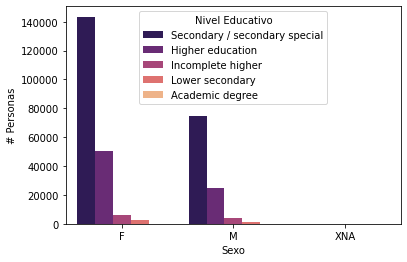

In [ ]:
sns.barplot(data = tab5,
            estimator = sum,
            x = "Sexo", 
            y = "# Personas",
            hue = "Nivel Educativo",
            palette = 'magma',
            ci = None,
            )

In [ ]:
tab5 = datos['FAMILY_STATUS'].value_counts().rename_axis('Estado Civil').reset_index(name='# Personas')
tab5

,Estado Civil,# Personas
0,Married,196432
1,Single / not married,45444
2,Civil marriage,29775
3,Separated,19770
4,Widow,16088
5,Unknown,2


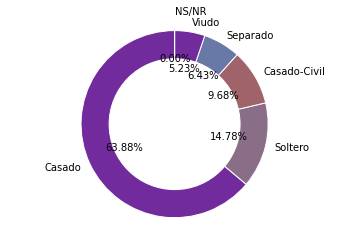

In [ ]:
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = [ '#712b9d', '#8a6e88', '#a1636a', '#6879a8']
mylabels = ['Casado', "Soltero", "Casado-Civil", "Separado", "Viudo", "NS/NR"]
fig1, ax1 = plt.subplots()
ax1.pie(tab5['# Personas'],
        labels=mylabels,
        explode = explode,
        autopct='%1.2f%%',
        shadow=False, 
        startangle=90,
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
p=plt.gcf()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
tab6 = datos['INCOME_TYPE'].value_counts().rename_axis('Fuente de Ingreso').reset_index(name='# Personas')
tab6


,Fuente de Ingreso,# Personas
0,Workingg,158774
1,Commercial associate,71617
2,Pensioner,55362
3,State servant,21703
4,Unemployed,22
5,Student,18
6,Businessman,10
7,Maternity leave,5


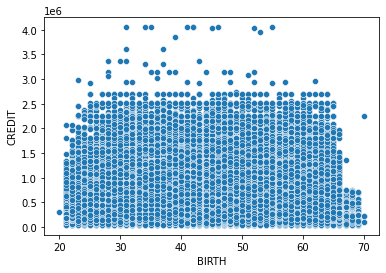

In [ ]:
sns.scatterplot(data=datos,  y="CREDIT", x="BIRTH", palette = "magma")

In [ ]:
df = datos[datos['INCOME'] < 250000]
df2 = datos[datos['TARGET'] == 1]
df2.head()

,ID,TARGET,CONTRACT_TYPE,SEX,OWN_REALTY,CHILDREN,INCOME,CREDIT,INCOME_TYPE,EDUCATION_TYPE,FAMILY_STATUS,HOUSING_TYPE,BIRTH,EMPLOYED,EMP_PHONE,CONT_MOBILE,EMAIL,OCCUPATION_TYPE,WEEKDAY,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT,DEF_60_CNT,DAYS_LAST_PHONE_CHANGE,BUREAU_3,INCOME_group,CREDIT_group,BIRTH_group
0,100002,1,Cash loans,M,1,0,202500,406598,Workingg,Secondary / secondary special,Single / not married,House / apartment,26,2,1,1,0,Laborers,WEDNESDAY,0,2.0,2.0,-1134.0,0.0,"(175000, 250000]","(275000, 600000]","(20, 30]"
26,100031,1,Cash loans,F,1,0,112500,979992,Workingg,Secondary / secondary special,Widow,House / apartment,52,7,1,1,0,Cooking staff,MONDAY,0,1.0,0.0,-161.0,2.0,"(100000, 175000]","(875000, 4050000]","(50, 70]"
40,100047,1,Cash loans,M,1,0,202500,1193580,Commercial associate,Secondary / secondary special,Married,House / apartment,48,4,1,1,0,Laborers,TUESDAY,0,0.0,0.0,-1075.0,0.0,"(175000, 250000]","(875000, 4050000]","(40, 50]"
42,100049,1,Cash loans,F,0,0,135000,288873,Workingg,Secondary / secondary special,Civil marriage,House / apartment,37,10,1,1,0,Sales staff,THURSDAY,0,0.0,0.0,-1480.0,0.0,"(100000, 175000]","(275000, 600000]","(30, 40]"
81,100096,1,Cash loans,F,1,0,81000,252000,Pensioner,Secondary / secondary special,Married,House / apartment,68,50,0,1,0,NaN,THURSDAY,0,1.0,1.0,0.0,0.0,"(25000, 100000]","(45000, 275000]","(50, 70]"


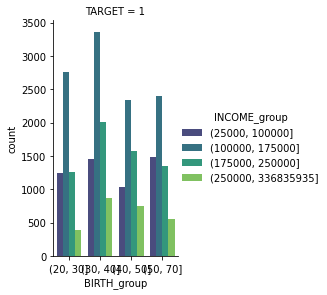

In [ ]:
g = sns.catplot(x="BIRTH_group", hue="INCOME_group", col="TARGET",
                data=df2, kind="count",
                height=4, aspect=.7, palette="viridis");